### Required Assignment 5.1: Will the Customer Accept the Coupon?

Valentine Fontama

This assignment will explore the dataset in this assignment to determine which customers are likley to accept coupons or not.

Import libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Load the data and show first few records

In [3]:
data = pd.read_csv('data/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Start EDA

In [4]:
print('Shape of the data:', data.shape)
print('Columns in the data:', data.columns) 
print('Data types in the data:', data.info())

Shape of the data: (12684, 26)
Columns in the data: Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expirati

Find missing values

In [5]:
# Show number of missing values in each column
print("Missing values in each column:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Missing values in each column:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


Now deal with missing values. Drop the car column since it has too many missing values. Also drop missing values in the rest of the columns

In [6]:
# Drop the car column since it has too many missing values
data = data.drop(columns=['car'])

# Drop missing values in the rest of the columns
data = data.dropna()
num = len(data)
print(f"Number of rows after dropping missing values: {num}")

Number of rows after dropping missing values: 12079


Now look for duplicates in the data


In [7]:
duplicates = data.duplicated().sum()
duplicates_percentage = (duplicates / len(data)) * 100
print(f"Number of duplicate rows: {duplicates} ({duplicates_percentage:.2f}%)")
  

Number of duplicate rows: 72 (0.60%)


Now remove duplicates from the dataframe


In [8]:
data = data.drop_duplicates()
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [9]:
Shape = data.shape
print(f"Shape of the data after dropping duplicates: {Shape}")

Shape of the data after dropping duplicates: (12007, 25)


What proportion of customers accepted the coupons

Proportion of customers who accepted the coupons:
Y
1    0.568418
0    0.431582
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of Accepted Coupons')

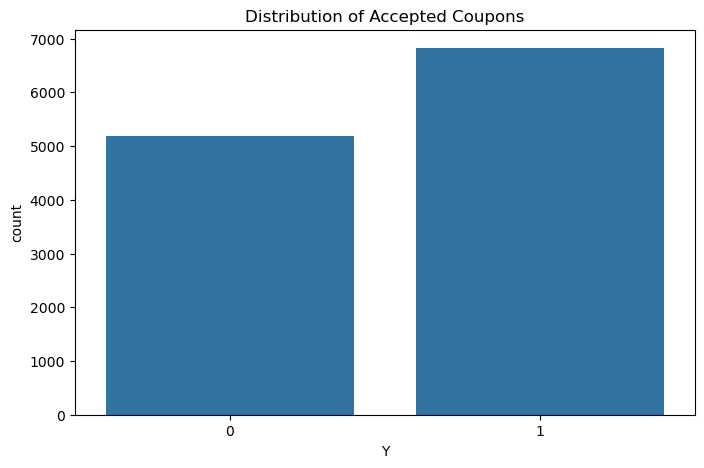

In [10]:
# What proportion of customers accepted the coupons
accepted_proportion = data['Y'].value_counts(normalize=True)
print("Proportion of customers who accepted the coupons:")  
print(accepted_proportion)
# Plot the distribution of accepted coupons 
plt.figure(figsize=(8, 5))
sns.countplot(x='Y', data=data)
plt.title('Distribution of Accepted Coupons')

show a heatmap of the correlation matrix

<Axes: >

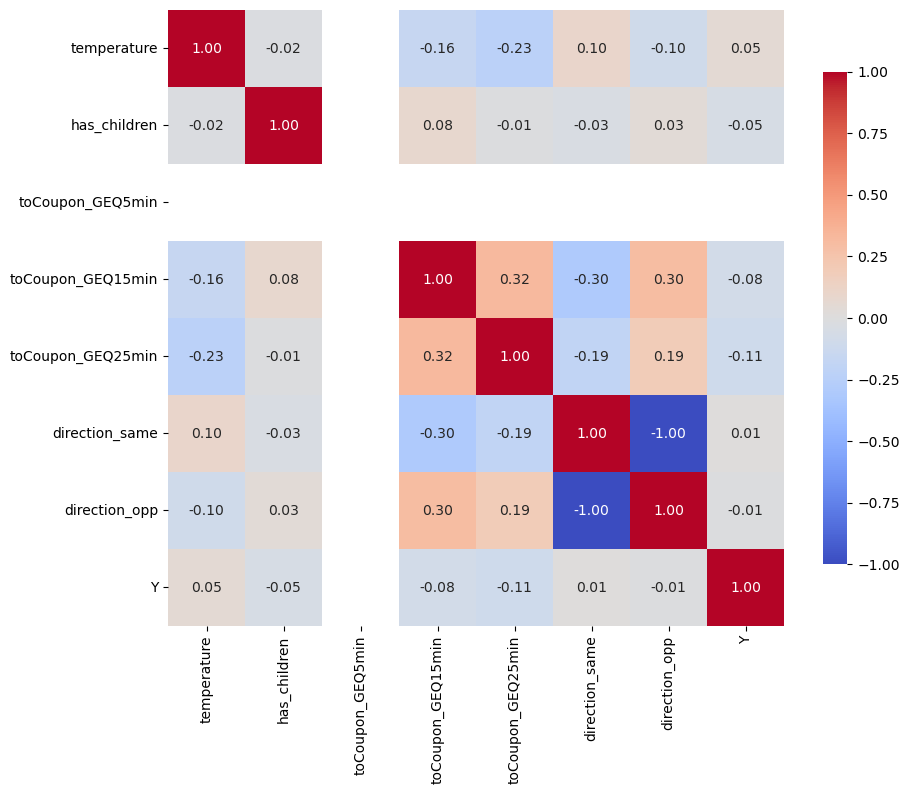

In [11]:
plt.figure(figsize=(10, 8)) 
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>],
       [<Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

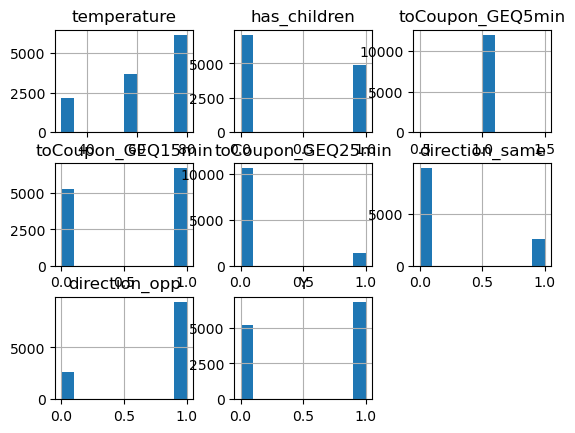

In [12]:
data.hist()

**Start with univariate analysis of the numeric variables**

Acceptance rate by age group. 

Insight: Under 21 age group has the highest acceptance rate by age, followed by age 26 and 21

In [13]:
accept_by_age = data.groupby('age')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_age

age
below21    0.63
26         0.60
21         0.59
41         0.57
46         0.57
31         0.55
36         0.54
50plus     0.51
Name: Y, dtype: float64

Text(0.5, 1.0, 'Coupon Acceptance by Age Group')

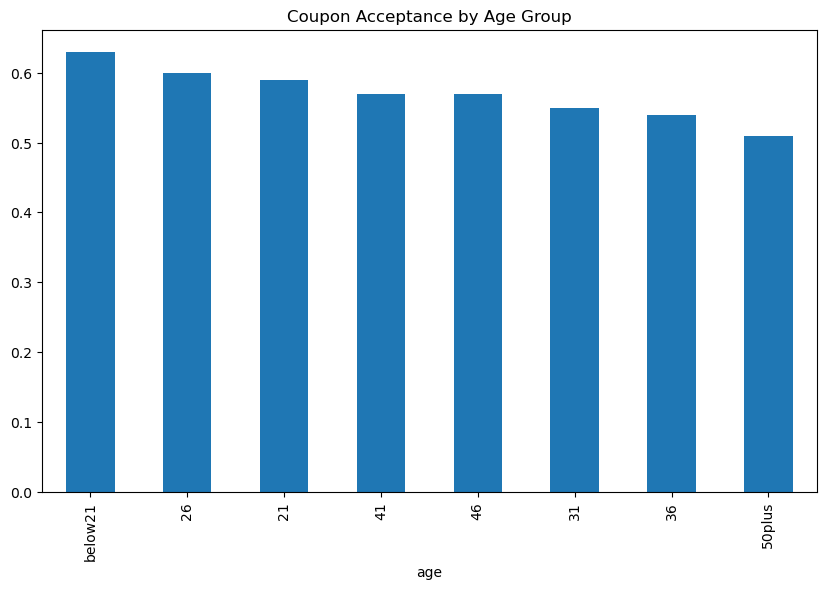

In [14]:
accept_by_age.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Age Group')

Plot the histogram of temperature

Text(0.5, 0, 'Temperature')

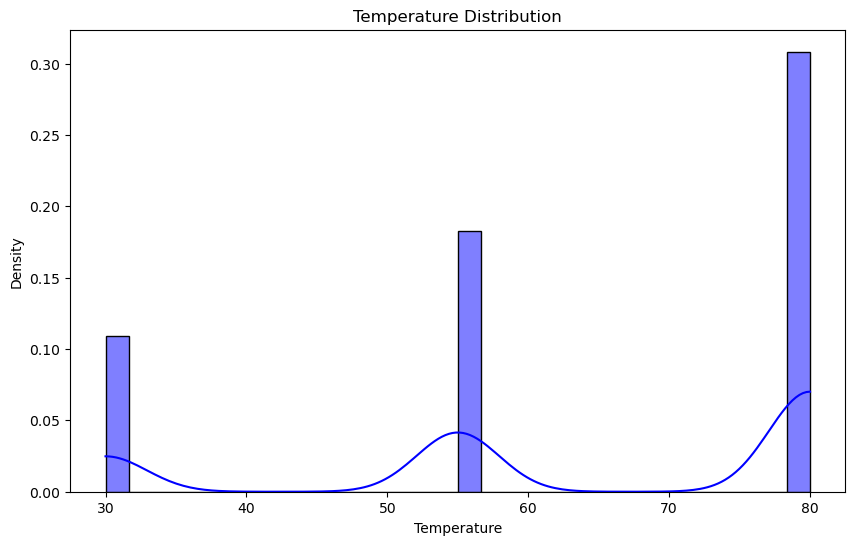

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=30, kde=True, color='blue', stat='density')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')

Acceptance rate by temperature. Insight: Customers seem to accept coupons at higher rates when temperature is very high e.g 80 degrees Farenheit

In [16]:
accept_by_temp = data.groupby('temperature')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_temp

temperature
80    0.60
30    0.54
55    0.54
Name: Y, dtype: float64

Text(0.5, 1.0, 'Coupon Acceptance by Temperature')

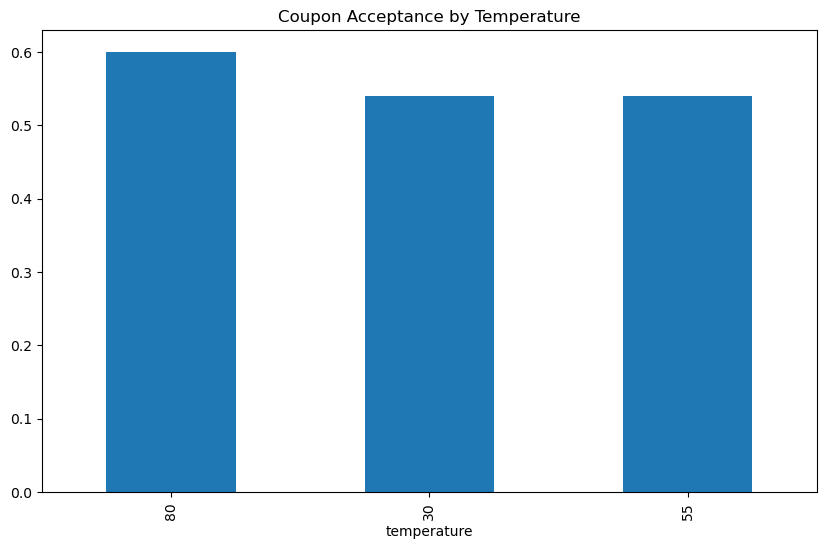

In [17]:
accept_by_temp.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Temperature')

Acceptance rate by parental status. Insight: Customers without children are more likely to accept coupons than those with kids.

In [18]:
accept_by_kids = data.groupby('has_children')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_kids

has_children
0    0.59
1    0.54
Name: Y, dtype: float64

Text(0.5, 1.0, 'Coupon Acceptance by Number of Children')

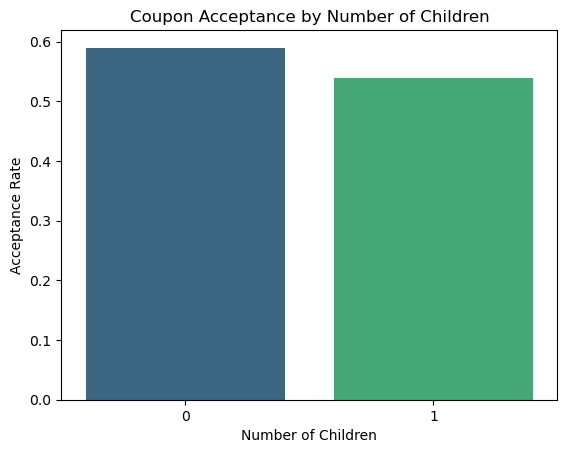

In [19]:
sns.barplot(x=accept_by_kids.index, y=accept_by_kids.values, palette='viridis', hue=accept_by_kids.index, legend=False)
plt.xlabel('Number of Children')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance by Number of Children')

Acceptance rate by location. Insight: Customers within 25 minutes of a business are actually less likely to accept coupons than the rest.

In [20]:
accept_by_25min = data.groupby('toCoupon_GEQ25min')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_25min

toCoupon_GEQ25min
0    0.59
1    0.42
Name: Y, dtype: float64

Text(0.5, 1.0, 'Coupon Acceptance by Distance to Business (>= 25 min)')

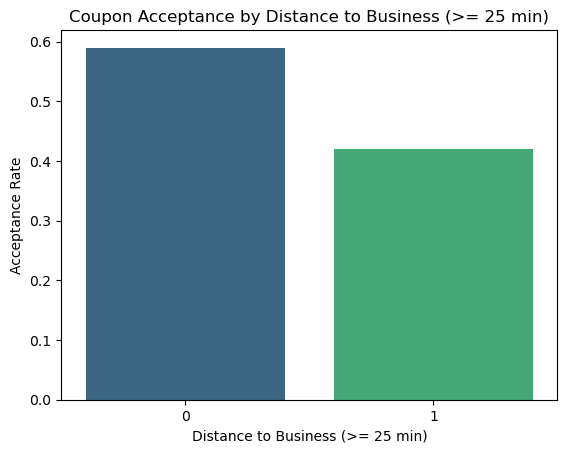

In [21]:
sns.barplot(x=accept_by_25min.index, y=accept_by_25min.values, palette='viridis', hue=accept_by_25min.index, legend=False)      
plt.xlabel('Distance to Business (>= 25 min)')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance by Distance to Business (>= 25 min)')

Acceptance rate by income. Insight: Customers with income under462,500 are more likely to accept the coupon. The exception is those over $100K. I'll explore if they accept coupons from highend restaurants more. 

In [22]:
accept_by_inc = data.groupby('income')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_inc


income
$25000 - $37499     0.60
$50000 - $62499     0.59
Less than $12500    0.59
$100000 or More     0.58
$12500 - $24999     0.58
$37500 - $49999     0.57
$62500 - $74999     0.53
$87500 - $99999     0.52
$75000 - $87499     0.49
Name: Y, dtype: float64

Text(0.5, 0, 'Income Level')

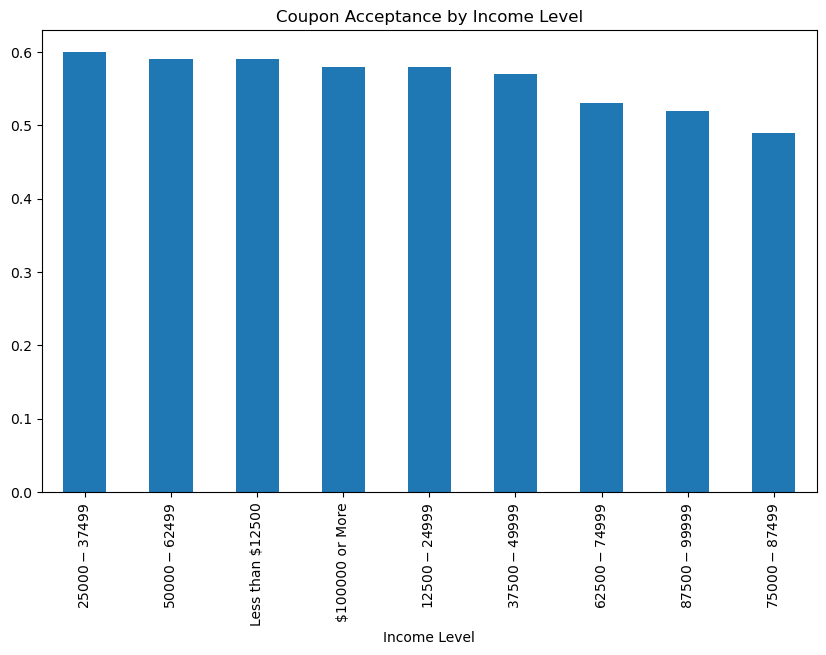

In [23]:
accept_by_inc.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Income Level')  
plt.xlabel('Income Level')

Acceptance rate by profession: 
Insight: Healthcare, Production occupations and contruction workers are more likely to accept coupons than the rest.

In [24]:
accept_by_prof = data.groupby('occupation')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_prof

occupation
Healthcare Practitioners & Technical         0.72
Production Occupations                       0.70
Healthcare Support                           0.70
Construction & Extraction                    0.69
Protective Service                           0.64
Architecture & Engineering                   0.63
Student                                      0.61
Office & Administrative Support              0.60
Transportation & Material Moving             0.60
Building & Grounds Cleaning & Maintenance    0.59
Management                                   0.59
Life Physical Social Science                 0.58
Food Preparation & Serving Related           0.57
Business & Financial                         0.57
Personal Care & Service                      0.56
Computer & Mathematical                      0.56
Sales & Related                              0.56
Unemployed                                   0.55
Arts Design Entertainment Sports & Media     0.53
Farming Fishing & Forestry             

Text(0.5, 1.0, 'Acceptance Rate by Occupation')

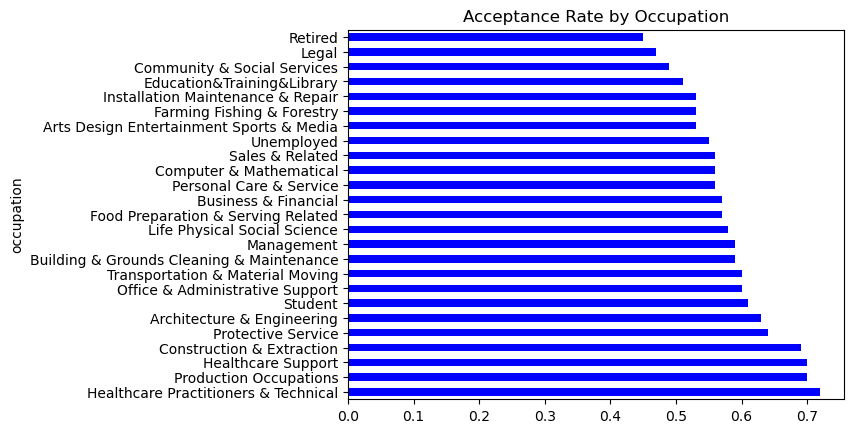

In [25]:
accept_by_prof.plot(kind='barh', color='blue')
plt.title('Acceptance Rate by Occupation')

# Multivaiate Analysis

**Investigate Bar Coupons**


In [55]:
# create a new dataframe with only the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


What proppotion of Bar coupons were accepted?

Proportion of customers who accepted the coupons:
Y
0    0.588143
1    0.411857
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of Accepted Coupons')

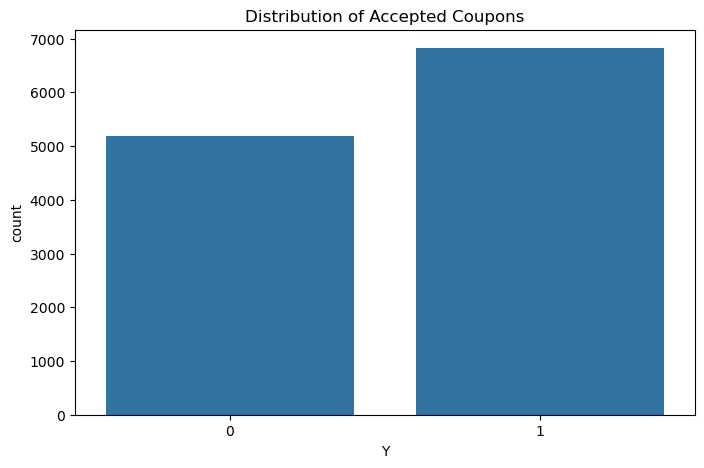

In [56]:
# What proportion of customers accepted the coupons
accepted_proportion = bar_coupons['Y'].value_counts(normalize=True)
print("Proportion of customers who accepted the coupons:")  
print(accepted_proportion)
# Plot the distribution of accepted coupons 
plt.figure(figsize=(8, 5))
sns.countplot(x='Y', data=data)
plt.title('Distribution of Accepted Coupons')

This is much less than overall coupon acceptance rates. Overall 56.8% of coupns were accepted. However, only 41.1% of bar coupons were accepted!

Let's review acceptance rates by the Bar variable
Insight: Those who visit bars more frequently are more likely to accept coupons.

In [57]:
accept_by_bar = bar_coupons.groupby("Bar")["Y"].mean().round(2).sort_values(ascending=False)
accept_by_bar


Bar
4~8      0.78
gt8      0.72
1~3      0.65
less1    0.45
never    0.19
Name: Y, dtype: float64

Text(0.5, 1.0, 'Acceptance Rate by frequency of Bar visits')

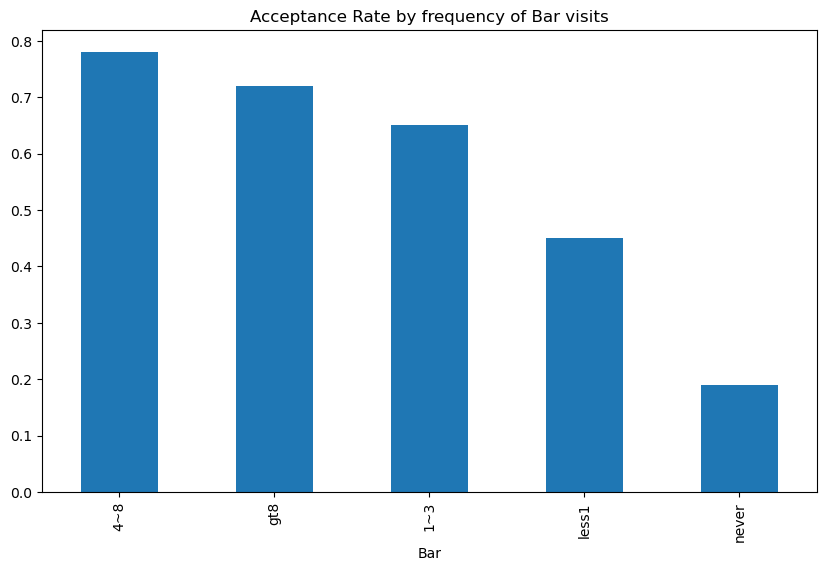

In [58]:
accept_by_bar.plot(kind='bar', stacked=False, figsize=(10, 6))  
plt.title('Acceptance Rate by frequency of Bar visits')

Compare acceptance rates for those who visited a bar 3 times or less a month vs the rest. 

Insight: Those who visited bars less frequently were LESS likely accept coupons than the rest. In fact, those who visited bars less than once or never are significantly less likely to accept coupons. We shouldn't target them.

In [59]:
# Filter the data for specific Bar categories
filtered_data = bar_coupons[(bar_coupons['Bar'] == "never") | 
                      (bar_coupons['Bar'] == "less1") | 
                      (bar_coupons['Bar'] == "1~3")]

#filtered_data[['Bar', 'Y']].head(50)
bar_freq = filtered_data['Y'].value_counts(normalize=True)

# Display the result
print("Acceptance rates: ",bar_freq)


Acceptance rates:  Y
0    0.627554
1    0.372446
Name: proportion, dtype: float64


Text(0, 0.5, 'Acceptance Rate')

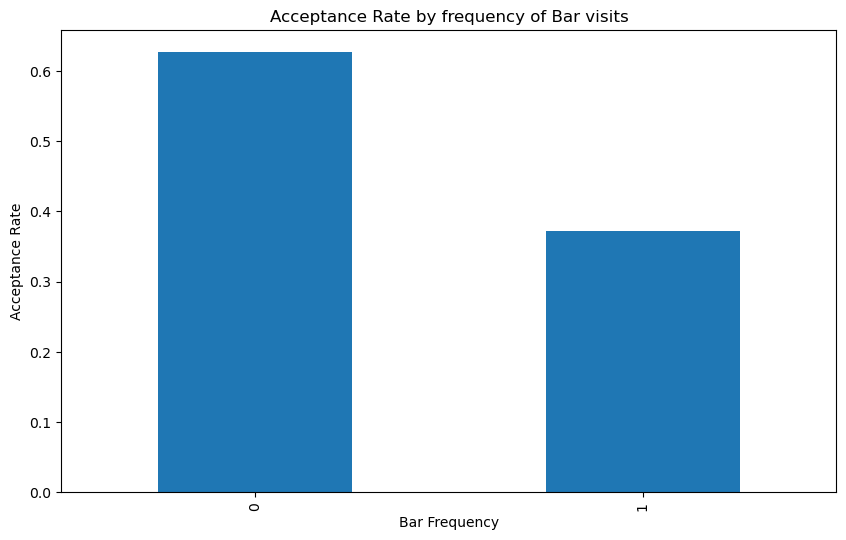

In [60]:
bar_freq.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Acceptance Rate by frequency of Bar visits') 
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')

Compare acceptance rates for those who go to the bar more than once a month and are over age 25. 

Insight: Adults over 25 who visit bars more than once a month have much higher accptance rates than the rest!

In [61]:
# Convert the 'age' column to numeric, coercing errors to NaN
bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')

# Filter the DataFrame
filtered_bar_coupons = bar_coupons[(bar_coupons['Bar'] != "never") & (bar_coupons['Bar'] != "less1") &
								   (bar_coupons['age'] > 25)]
bar_freq = filtered_bar_coupons['Y'].value_counts(normalize=True)
# Display the result
print("Acceptance rates: ", bar_freq)


Acceptance rates:  Y
1    0.694118
0    0.305882
Name: proportion, dtype: float64


C:\Users\Valentine Fontama\AppData\Local\Temp\ipykernel_10300\2134592502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['age'] = pd.to_numeric(bar_coupons['age'], errors='coerce')


Text(0, 0.5, 'Acceptance Rate')

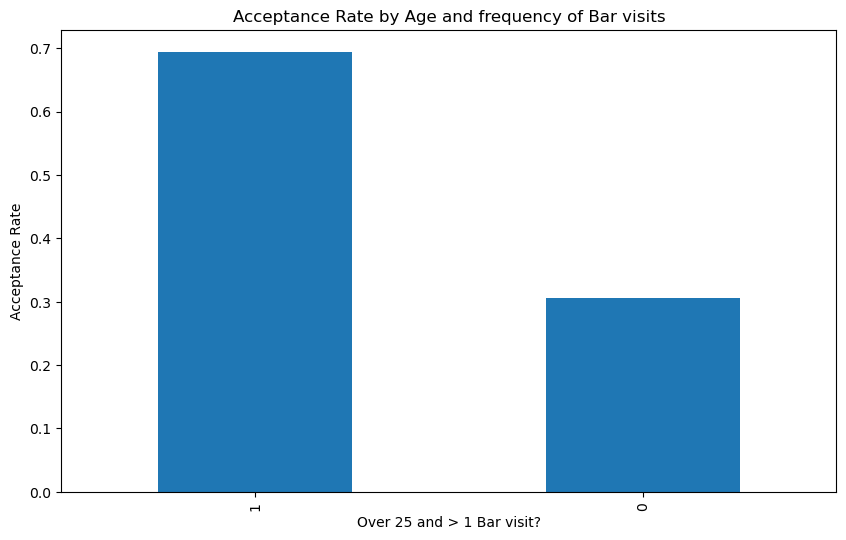

In [62]:
bar_freq.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Acceptance Rate by Age and frequency of Bar visits') 
plt.xlabel('Over 25 and > 1 Bar visit?')
plt.ylabel('Acceptance Rate')

Acceptance rates by age and frequency of Bar visits.
Insight: Acceptance rate depends not only on the frequency of Bar visits but also on athe passenger type. Those driving with friends are most likely to accept the coupon, while those driving alone are less likely to accept it.

In [63]:
accept_by_bar = bar_coupons.groupby(["Bar", "passanger"])["Y"].mean().round(2).sort_values(ascending=False)
accept_by_bar

Bar    passanger
gt8    Kid(s)       1.00
1~3    Friend(s)    0.83
4~8    Alone        0.82
gt8    Alone        0.73
4~8    Friend(s)    0.72
gt8    Friend(s)    0.69
       Partner      0.67
4~8    Partner      0.67
1~3    Alone        0.65
less1  Friend(s)    0.61
1~3    Partner      0.58
4~8    Kid(s)       0.57
less1  Partner      0.48
       Alone        0.43
1~3    Kid(s)       0.32
never  Friend(s)    0.32
less1  Kid(s)       0.24
never  Alone        0.18
       Partner      0.13
       Kid(s)       0.11
Name: Y, dtype: float64

Compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

Insight: Those who visit the bar more frequently are more likely to accept the coupon, especially if their passengers are not kids and they themselves are not farmers, fishermen or forestry workers.

In [64]:
filtered_bar_coupons = bar_coupons[(bar_coupons['Bar'] != "never")  & 
            (bar_coupons['Bar'] != "less1") &
            (bar_coupons['passanger'] != "Kid(s)") &  
            (bar_coupons['occupation'] != "farming") & 
			(bar_coupons['occupation'] != "fishing") & 
			(bar_coupons['occupation'] != "forestry")]


# y_counts_bar3 = filtered_bar_coupons['Y'].value_counts()
#print("Frequencies in the Y column: ", y_counts_bar3)
bar_freq = filtered_bar_coupons['Y'].value_counts(normalize=True)
bar_freq

Y
1    0.709434
0    0.290566
Name: proportion, dtype: float64

Filter for customers who went to a bar over 3 times a month, had passengers other than kids, and were not widowed.

Insight: this cohort of customers are more likely to accept coupons than the rest. 

In [65]:
accept_by_bar = bar_coupons.groupby(['Bar', 'passanger', 'maritalStatus'])['Y'].mean().round(2).sort_values(ascending=False)
accept_by_bar.head(60)

# 'age', 'RestaurantLessThan20', 'income'

Bar    passanger  maritalStatus    
4~8    Alone      Divorced             1.00
less1  Kid(s)     Single               1.00
gt8    Alone      Married partner      1.00
       Friend(s)  Unmarried partner    1.00
4~8    Kid(s)     Unmarried partner    1.00
gt8    Kid(s)     Unmarried partner    1.00
       Partner    Married partner      1.00
4~8    Friend(s)  Married partner      1.00
less1  Friend(s)  Unmarried partner    1.00
gt8    Alone      Unmarried partner    1.00
less1  Partner    Single               1.00
1~3    Friend(s)  Unmarried partner    1.00
4~8    Alone      Married partner      0.92
1~3    Alone      Divorced             0.88
       Friend(s)  Single               0.85
4~8    Friend(s)  Single               0.83
       Alone      Single               0.81
       Partner    Married partner      0.75
                  Single               0.75
       Alone      Unmarried partner    0.73
1~3    Alone      Married partner      0.71
less1  Friend(s)  Single               0

In [66]:
# Filter for customers who went to a bar over 3 times a month, had passengers other than kids, and were not widowed
filtered_bar_coupons = bar_coupons[(bar_coupons['Bar'] != "never")  & 
            (bar_coupons['Bar'] != "less1") &
            (bar_coupons['passanger'] != "Kid(s)") &  
            (bar_coupons['maritalStatus'] != "widowed")]

bar_freq = filtered_bar_coupons['Y'].value_counts(normalize=True)
bar_freq

Y
1    0.709434
0    0.290566
Name: proportion, dtype: float64

 Filter for customers who went to a bar over 3 times a month, and are under the age of 30:

 This is cohort is even more likely to accept the coupon than the previous one.

In [67]:
# Filter for customers who went to a bar over 3 times a month, and are under the age of 30
filtered_bar_coupons = bar_coupons[(bar_coupons['Bar'] != "never")  & 
            (bar_coupons['Bar'] != "less1") &
            (bar_coupons['age'] < 30)]
bar_freq = filtered_bar_coupons['Y'].value_counts(normalize=True)
bar_freq

Y
1    0.72956
0    0.27044
Name: proportion, dtype: float64

Customers who went to a cheap restaurant over 4 times a month and whose income is below 50k

Insight: this cohort of customers have very low acceptance rates compared to to the last 2

In [68]:
# filter bar_counts for customers who went to a cheap restaurant over 4 times a month and whose income is below 50k
filtered_bar_coupons = bar_coupons[ ((bar_coupons['RestaurantLessThan20'] == "4~8")  |
            (bar_coupons['RestaurantLessThan20'] == "gt8")) &
            ((bar_coupons['income'] == "Less than $12500") |
            (bar_coupons['income'] == "$12500 - $24999") |
            (bar_coupons['income'] == "$25000 - $37499") |
            (bar_coupons['income'] == "$37500 - $49999") ) ]
bar_freq = filtered_bar_coupons['Y'].value_counts(normalize=True)
bar_freq

Y
0    0.543544
1    0.456456
Name: proportion, dtype: float64

From the above analysis I have the following hypotheses:
1) Under 21 age group has the highest acceptance rate by age, followed by age 26 and 21
2) Young people under 30 who visit bars over 3 times a month are more likely to accept the bar coupons
3) Customers who went to a bar over 3 times a month, had passengers other than kids, and were not widowed are also more likely to accept coupons.
4) Those with low income under $50K who frequent cheap restaurants over 4 times a month are unlikely to accept coupons. So are those not regular goers (especially those who only visit bars under 3 times a month)
5) Those who visit the bar more frequently are more likely to accept the coupon, especially if their passengers are not kids and they themselves are not farmers, fishermen or forestry workers.

# Now explore customers who received coupons for cheap restaurants

Create a new dataframe with only the cheap restaurant coupons i.e. those with 'Restaurant(<20)' in the coupon column

In [70]:
cheap_restaurant_coupons = data[data['coupon'] == 'Restaurant(<20)']
cheap_restaurant_coupons[['coupon', 'RestaurantLessThan20','income','Y']].head(10)

,coupon,RestaurantLessThan20,income,Y
22,Restaurant(<20),4~8,$62500 - $74999,1
29,Restaurant(<20),4~8,$62500 - $74999,1
31,Restaurant(<20),4~8,$62500 - $74999,1
42,Restaurant(<20),4~8,$62500 - $74999,1
44,Restaurant(<20),1~3,$12500 - $24999,1
51,Restaurant(<20),1~3,$12500 - $24999,1
53,Restaurant(<20),1~3,$12500 - $24999,1
64,Restaurant(<20),1~3,$12500 - $24999,0
66,Restaurant(<20),1~3,$75000 - $87499,1
71,Restaurant(<20),1~3,$75000 - $87499,1


What percentage of cheap restaurant customers accepted the coupons?

Proportion of customers who accepted the coupons:
Y
1    0.709751
0    0.290249
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of Accepted Coupons')

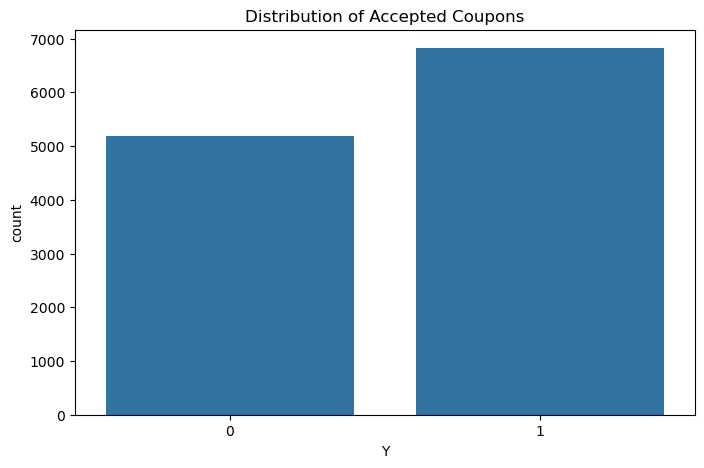

In [71]:
# What proportion of customers accepted the coupons
accepted_proportion = cheap_restaurant_coupons['Y'].value_counts(normalize=True)
print("Proportion of customers who accepted the coupons:")  
print(accepted_proportion)
# Plot the distribution of accepted coupons 
plt.figure(figsize=(8, 5))
sns.countplot(x='Y', data=data)
plt.title('Distribution of Accepted Coupons')

This is much higher than overall coupon acceptance rates. Overall 56.8% of coupons were accepted. However, over 70.1% of cheap restaurant coupons were accepted!

Lets's check the acceptance rate by frequency of cheap restaurant visits

Insight: those who visit cheap restaurants are more likely to accept coupons!

In [72]:
accept_by_resto = cheap_restaurant_coupons.groupby("RestaurantLessThan20")["Y"].mean().round(2).sort_values(ascending=False)
accept_by_resto


RestaurantLessThan20
gt8      0.76
4~8      0.72
1~3      0.70
less1    0.68
never    0.63
Name: Y, dtype: float64

Text(0.5, 0, 'Restaurant Frequency')

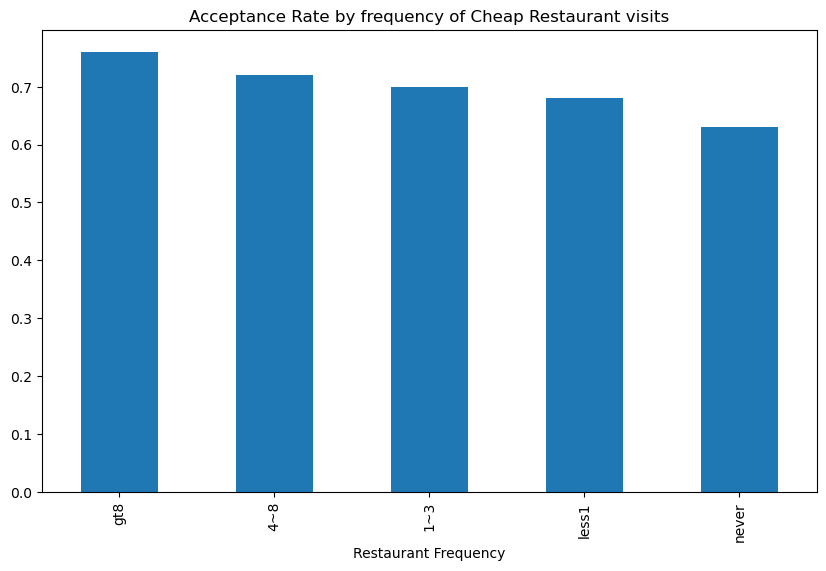

In [73]:
accept_by_resto.plot(kind='bar', stacked=False, figsize=(10, 6))    
plt.title('Acceptance Rate by frequency of Cheap Restaurant visits')
plt.xlabel('Restaurant Frequency')

Let's see how the acceptance rate varies with the number of children


In [74]:
accept_by_kids = cheap_restaurant_coupons.groupby('has_children')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_kids

has_children
0    0.72
1    0.69
Name: Y, dtype: float64

Text(0.5, 0, 'Has Children?')

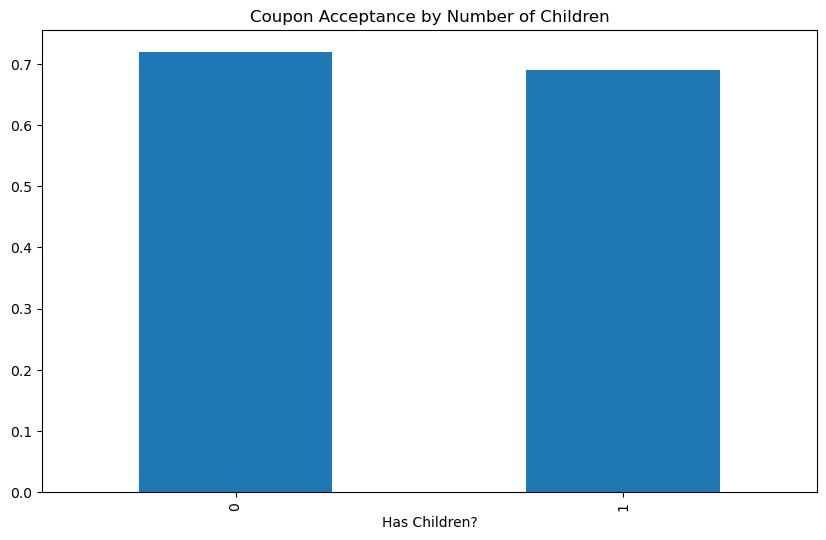

In [76]:
accept_by_kids.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Number of Children')    
plt.xlabel('Has Children?')

In [ ]:
Let's review acceptance rates by age

In [77]:
accept_by_age = cheap_restaurant_coupons.groupby('age')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_age

age
46         0.75
21         0.74
26         0.74
below21    0.74
41         0.72
31         0.71
36         0.65
50plus     0.64
Name: Y, dtype: float64

Text(0.5, 0, 'Age Group')

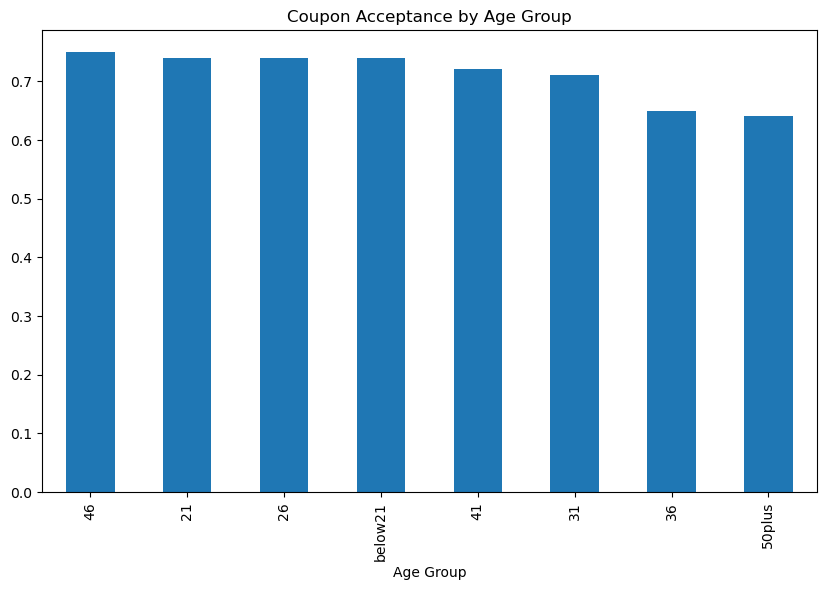

In [78]:
accept_by_age.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Age Group')     
plt.xlabel('Age Group')

Review acceptance rates by income


In [80]:
accept_by_inc = cheap_restaurant_coupons.groupby('income')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_inc

income
$25000 - $37499     0.77
$50000 - $62499     0.77
$100000 or More     0.72
Less than $12500    0.72
$62500 - $74999     0.70
$75000 - $87499     0.69
$12500 - $24999     0.68
$37500 - $49999     0.68
$87500 - $99999     0.58
Name: Y, dtype: float64

Text(0.5, 0, 'Income Level')

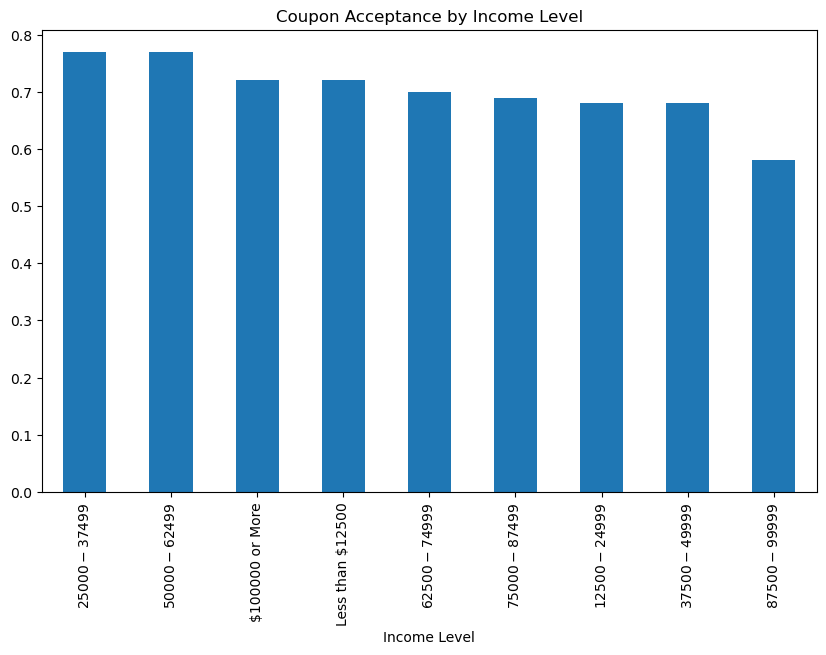

In [81]:
accept_by_inc.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Income Level')      
plt.xlabel('Income Level')

Now filter for customers who go to cheap restaurants over 4 times a month, and whose income is less than 50k 

In [82]:
 filtered_cheap_restaurant_coupons = cheap_restaurant_coupons[((cheap_restaurant_coupons['RestaurantLessThan20'] == "4~8")  |
            (cheap_restaurant_coupons['RestaurantLessThan20'] == "gt8")) &
            ((cheap_restaurant_coupons['income'] == "Less than $12500") |
            (cheap_restaurant_coupons['income'] == "$12500 - $24999") |
            (cheap_restaurant_coupons['income'] == "$25000 - $37499") |
            (cheap_restaurant_coupons['income'] == "$37500 - $49999") )]

accept_by_inc = filtered_cheap_restaurant_coupons.groupby('income')['Y'].mean().round(2).sort_values(ascending=False)
accept_by_inc

income
$25000 - $37499     0.76
Less than $12500    0.76
$37500 - $49999     0.71
$12500 - $24999     0.63
Name: Y, dtype: float64

Text(0.5, 0, 'Income Level')

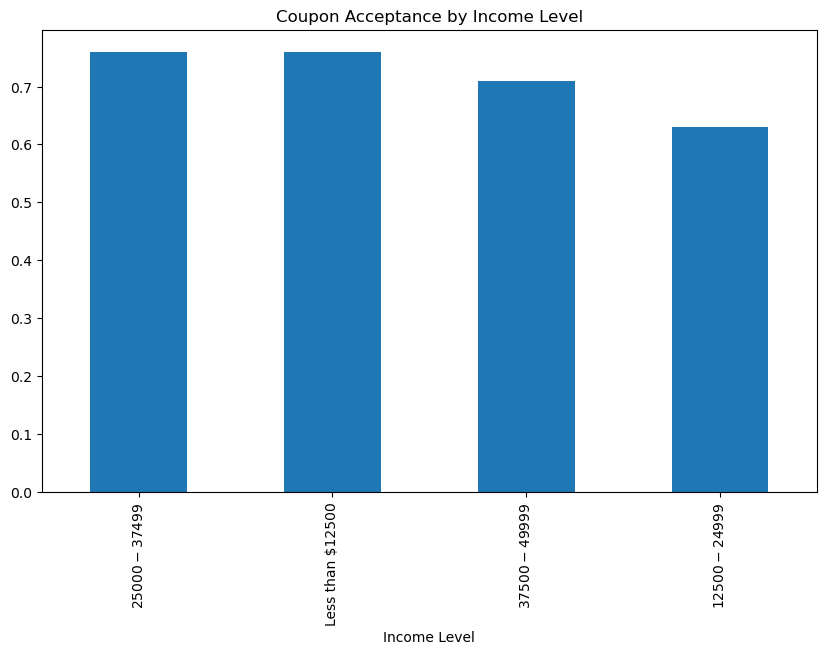

In [83]:
accept_by_inc.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Coupon Acceptance by Income Level')      
plt.xlabel('Income Level')

In [84]:
accept_by_freq = cheap_restaurant_coupons['Y'].value_counts(normalize=True)
accept_by_freq

Y
1    0.709751
0    0.290249
Name: proportion, dtype: float64